In [58]:
import pandas as pd
data = pd.read_csv('./housing.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [59]:
data.describe()
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [60]:
data.dropna(subset=['total_bedrooms'], inplace=True)
data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [61]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [62]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean')

In [63]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [64]:
data = data.rename(columns={'ocean_<1H OCEAN': '<1H'})
data = data.rename(columns={'ocean_NEAR BAY': 'NEAR_BAY'})
data = data.rename(columns={'ocean_ISLAND': 'ISLAND'})
data = data.rename(columns={'ocean_INLAND': 'INLAND'})
data = data.rename(columns={'ocean_NEAR OCEAN': 'NEAR_OCEAN'})

In [65]:
data = data.astype(int)

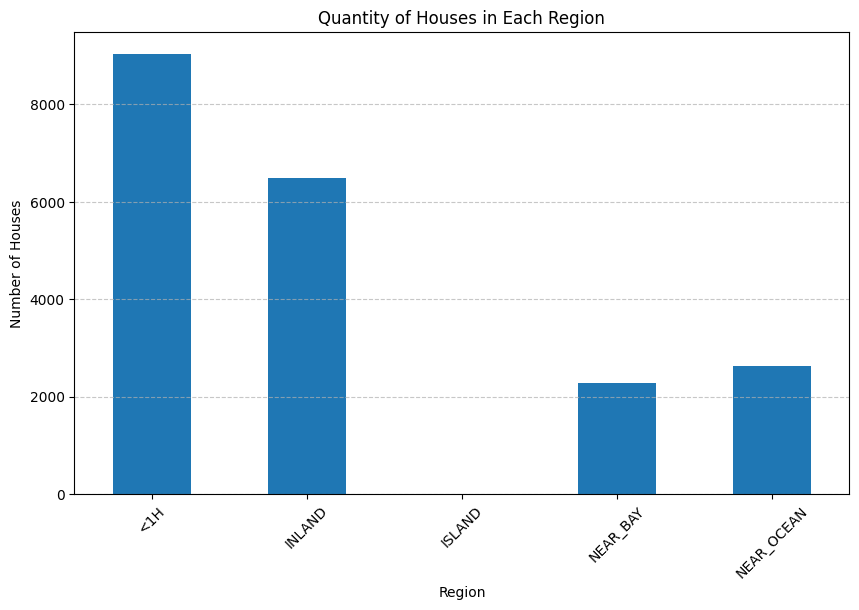

In [66]:
import matplotlib.pyplot as plt

# Summing up the counts for each region category
region_counts = data[['<1H', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']].sum()

# Plot the data
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Houses')
plt.title('Quantity of Houses in Each Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

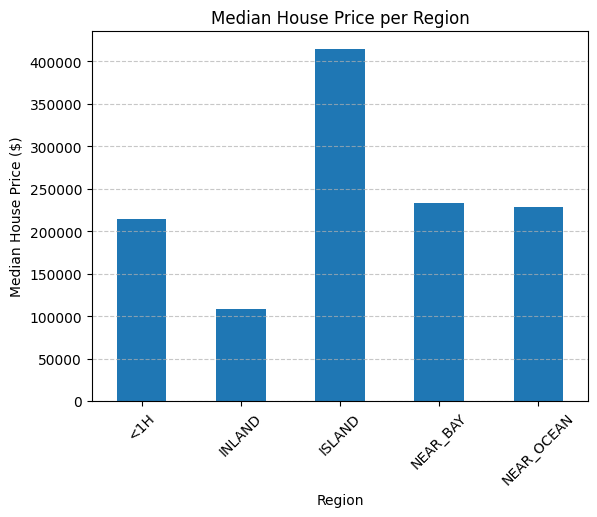

In [67]:
# Calculate the median house price for each region
median_prices = {
    region: data.loc[data[region] == 1, 'median_house_value'].median()
    for region in ['<1H', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']
}

# Convert to a DataFrame for plotting
import pandas as pd
median_prices_df = pd.DataFrame.from_dict(median_prices, orient='index', columns=['Median House Price'])

# Plot the data
plt.figure(figsize=(10, 6))
median_prices_df.plot(kind='bar', legend=False)
plt.xlabel('Region')
plt.ylabel('Median House Price ($)')
plt.title('Median House Price per Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

Split into training and test

In [69]:
X = data.drop(columns=['median_house_value'])  # All features except target
y = data['median_house_value']  # Target variable

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (16346, 16)
Testing set size: (4087, 16)


In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 51926.059528960075
Mean Squared Error (MSE): 5074338971.003803
R² Score: 0.6289380703339147


Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)  # No need for scaling

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest MAE: 38617.16425006118
Random Forest MSE: 3325606193.3495917
Random Forest R² Score: 0.7568144622451831


In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10]  
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=10, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Train the best model
best_rf = random_search.best_estimator_

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}


In [76]:
# Make predictions on the test set
y_pred_best_rf = best_rf.predict(X_test)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print results
print(f"Tuned Random Forest MAE: {mae_best_rf}")
print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R² Score: {r2_best_rf}")

Tuned Random Forest MAE: 38569.7353720432
Tuned Random Forest MSE: 3294018593.073667
Tuned Random Forest R² Score: 0.7591243110705931


decision tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")

Decision Tree MAE: 43163.38938565529
Decision Tree MSE: 4031159060.452475
Decision Tree R² Score: 0.7052207847544487
